<a href="https://colab.research.google.com/github/Abisai004int/Actividades/blob/main/Actividad_5_Procesamiento_de_conjuntos_de_datos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Cargar el dataset
df = pd.read_csv('robot_sensors.csv')

In [29]:
# Mostrar las primeras filas del dataset
print(df.head(10))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568


3.- Limpieza de datos


A.- Eliminar valores nulos

In [34]:
#Verificamos si existen valores nulos(missing valeus) en alguna columna y como manejarlo
#Utilizamos isnull() y sum() para identificar valores nulos
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [60]:
#Si encuentras valores nulos, puedes optar por rellenarlos con la media o eliminar las filas con datos faltantes
df['Distancia (cm)'] = df['Distancia (cm)'].dropna()
df['Velocidad (cm/s)'] = df['Velocidad (cm/s)'].dropna()
df['Temperatura (°C)'] = df['Temperatura (°C)'].dropna()

In [62]:
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [64]:
#Filtrar valores atipico (por ejemplo, si la velocidad es negativa)
df = df[df['Velocidad (cm/s)'] >= 0]
df = df[df['Temperatura (°C)'] >= 0]
df = df[df['Distancia (cm)'] >= 0]

In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        913 non-null    int64  
 1   Distancia (cm)    913 non-null    float64
 2   Velocidad (cm/s)  913 non-null    float64
 3   Temperatura (°C)  913 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 35.7 KB
None


In [66]:
df['Distancia_normalizada'] = (df['Distancia (cm)'] - df['Distancia (cm)'].min()) / (df['Distancia (cm)'].max() - df['Distancia (cm)'].min())
df['Velocidad_normalizada'] = (df['Velocidad (cm/s)'] - df['Velocidad (cm/s)'].min()) / (df['Velocidad (cm/s)'].max() - df['Velocidad (cm/s)'].min())
df['Temperatura_normalizada'] = (df['Temperatura (°C)'] - df['Temperatura (°C)'].min()) / (df['Temperatura (°C)'].max() - df['Temperatura (°C)'].min())
df['Tiempo_normalizado'] = (df['Tiempo (s)'] - df['Tiempo (s)'].min()) / (df['Tiempo (s)'].max() - df['Tiempo (s)'].min())

In [68]:
temperatura_max = df.loc[df['Temperatura (°C)'].idxmax()]
temperatura_min = df.loc[df['Temperatura (°C)'].idxmin()]
print(temperatura_max)
print(temperatura_min)

Tiempo (s)                 529.000000
Distancia (cm)              87.825014
Velocidad (cm/s)            26.958064
Temperatura (°C)            34.967313
Distancia_normalizada        0.864338
Velocidad_normalizada        0.537990
Temperatura_normalizada      1.000000
Tiempo_normalizado           0.529530
Name: 529, dtype: float64
Tiempo (s)                 902.000000
Distancia (cm)              26.329189
Velocidad (cm/s)            38.049538
Temperatura (°C)            20.000175
Distancia_normalizada        0.177677
Velocidad_normalizada        0.760666
Temperatura_normalizada      0.000000
Tiempo_normalizado           0.902903
Name: 902, dtype: float64


In [69]:
distancia_max = df.loc[df['Distancia (cm)'].idxmax()]
distancia_min = df.loc[df['Distancia (cm)'].idxmin()]
print(distancia_max)
print(distancia_min)

Tiempo (s)                 531.000000
Distancia (cm)              99.974591
Velocidad (cm/s)            30.516689
Temperatura (°C)            32.427039
Distancia_normalizada        1.000000
Velocidad_normalizada        0.609434
Temperatura_normalizada      0.830277
Tiempo_normalizado           0.531532
Name: 531, dtype: float64
Tiempo (s)                 821.000000
Distancia (cm)              10.416882
Velocidad (cm/s)             6.069321
Temperatura (°C)            23.430152
Distancia_normalizada        0.000000
Velocidad_normalizada        0.118619
Temperatura_normalizada      0.229167
Tiempo_normalizado           0.821822
Name: 821, dtype: float64


In [70]:
velocidad_max = df.loc[df['Velocidad (cm/s)'].idxmax()]
velocidad_min = df.loc[df['Velocidad (cm/s)'].idxmin()]
print(velocidad_max)
print(velocidad_min)

Tiempo (s)                 464.000000
Distancia (cm)              96.595529
Velocidad (cm/s)            49.970686
Temperatura (°C)            29.309907
Distancia_normalizada        0.962269
Velocidad_normalizada        1.000000
Temperatura_normalizada      0.622012
Tiempo_normalizado           0.464464
Name: 464, dtype: float64
Tiempo (s)                 921.000000
Distancia (cm)              53.868808
Velocidad (cm/s)             0.160913
Temperatura (°C)            30.689320
Distancia_normalizada        0.485184
Velocidad_normalizada        0.000000
Temperatura_normalizada      0.714174
Tiempo_normalizado           0.921922
Name: 921, dtype: float64


In [71]:
tiempo_max = df.loc[df['Tiempo (s)'].idxmax()]
tiempo_min = df.loc[df['Tiempo (s)'].idxmin()]
print(tiempo_max)
print(tiempo_min)

Tiempo (s)                 999.000000
Distancia (cm)              50.140520
Velocidad (cm/s)            14.109354
Temperatura (°C)            33.071211
Distancia_normalizada        0.443554
Velocidad_normalizada        0.280034
Temperatura_normalizada      0.873316
Tiempo_normalizado           1.000000
Name: 999, dtype: float64
Tiempo (s)                  0.000000
Distancia (cm)             43.708611
Velocidad (cm/s)            9.256646
Temperatura (°C)           23.925585
Distancia_normalizada       0.371735
Velocidad_normalizada       0.182609
Temperatura_normalizada     0.262269
Tiempo_normalizado          0.000000
Name: 0, dtype: float64


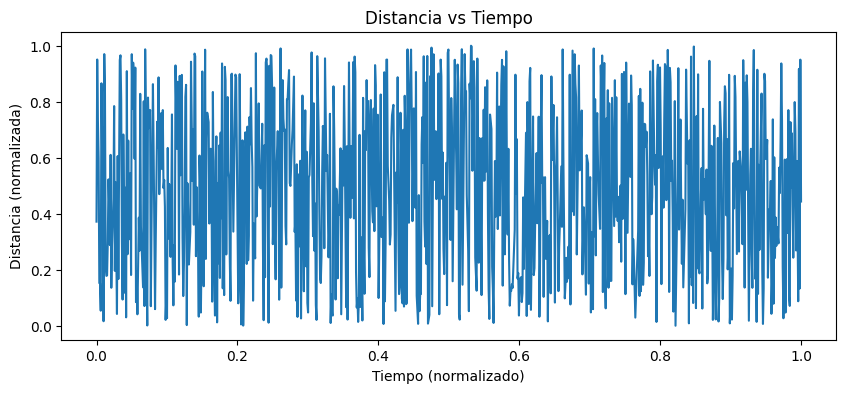

In [85]:
plt.figure(figsize=(10, 4))
plt.plot(df['Tiempo_normalizado'], df['Distancia_normalizada'], label='Distancia (cm)')
plt.xlabel('Tiempo (normalizado)')
plt.ylabel('Distancia (normalizada)')
plt.title('Distancia vs Tiempo')
plt.show()

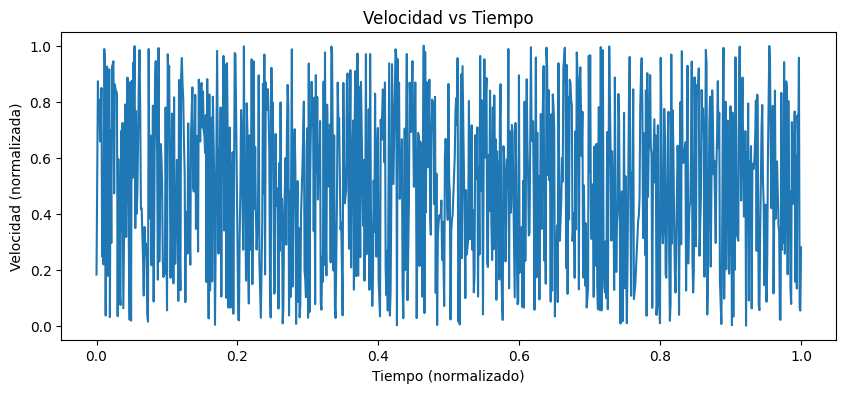

In [86]:
plt.figure(figsize=(10,4))
plt.plot(df['Tiempo_normalizado'], df['Velocidad_normalizada'], label='Velocidad (cm/s)')
plt.xlabel('Tiempo (normalizado)')
plt.ylabel('Velocidad (normalizada)')
plt.title('Velocidad vs Tiempo')
plt.show()

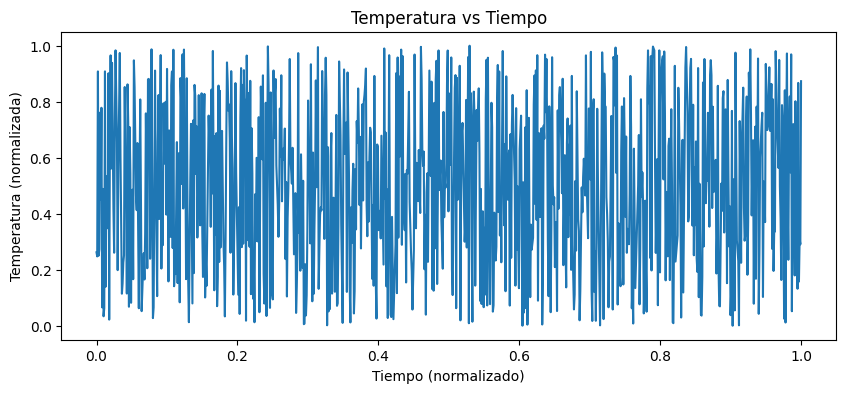

In [87]:
plt.figure(figsize=(10,4))
plt.plot(df['Tiempo_normalizado'], df['Temperatura_normalizada'], label='Temperatura (°C)')
plt.xlabel('Tiempo (normalizado)')
plt.ylabel('Temperatura (normalizada)')
plt.title('Temperatura vs Tiempo')
plt.show()